<a href="https://colab.research.google.com/github/mk1209567/ML_Parkinsons/blob/main/9_15_of_ML_Parkinson's_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parkinson's Disease Prediction**

Parkinson's disease is a progressive nervous system disorder that affects movement. It is estimated that about 10 million people worldwide are living with PD. However, there's no specific test for PD. Therefore, using machine learning methods to predict PD can be helpful for doctors making decision.

In this script, I will be using people and patients' voice frequency information to predict whether a person have PD.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import StackingClassifier

In [3]:
#import our parkinsons dataset
from google.colab import files
uploaded = files.upload()
parkdata= pd.read_csv('parkinsons.data.csv')

Saving parkinsons.data.csv to parkinsons.data.csv


**EDA**
1. Understanding the data: 'status' is our target (0= healthy, 1= PD)
2. Missing value
3. Bivariate analysis and outliers
4. Correlation
5. Skewness

In [4]:
#Exploring our data
parkdata.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
parkdata.info()
#there's no cat feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
parkdata.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
parkdata.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


**Missing Values**

No missing value

In [8]:
# Check missing value: no
parkdata.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Bivariate Analysis**

see the distribution of each column and their relationship with status(0,1)

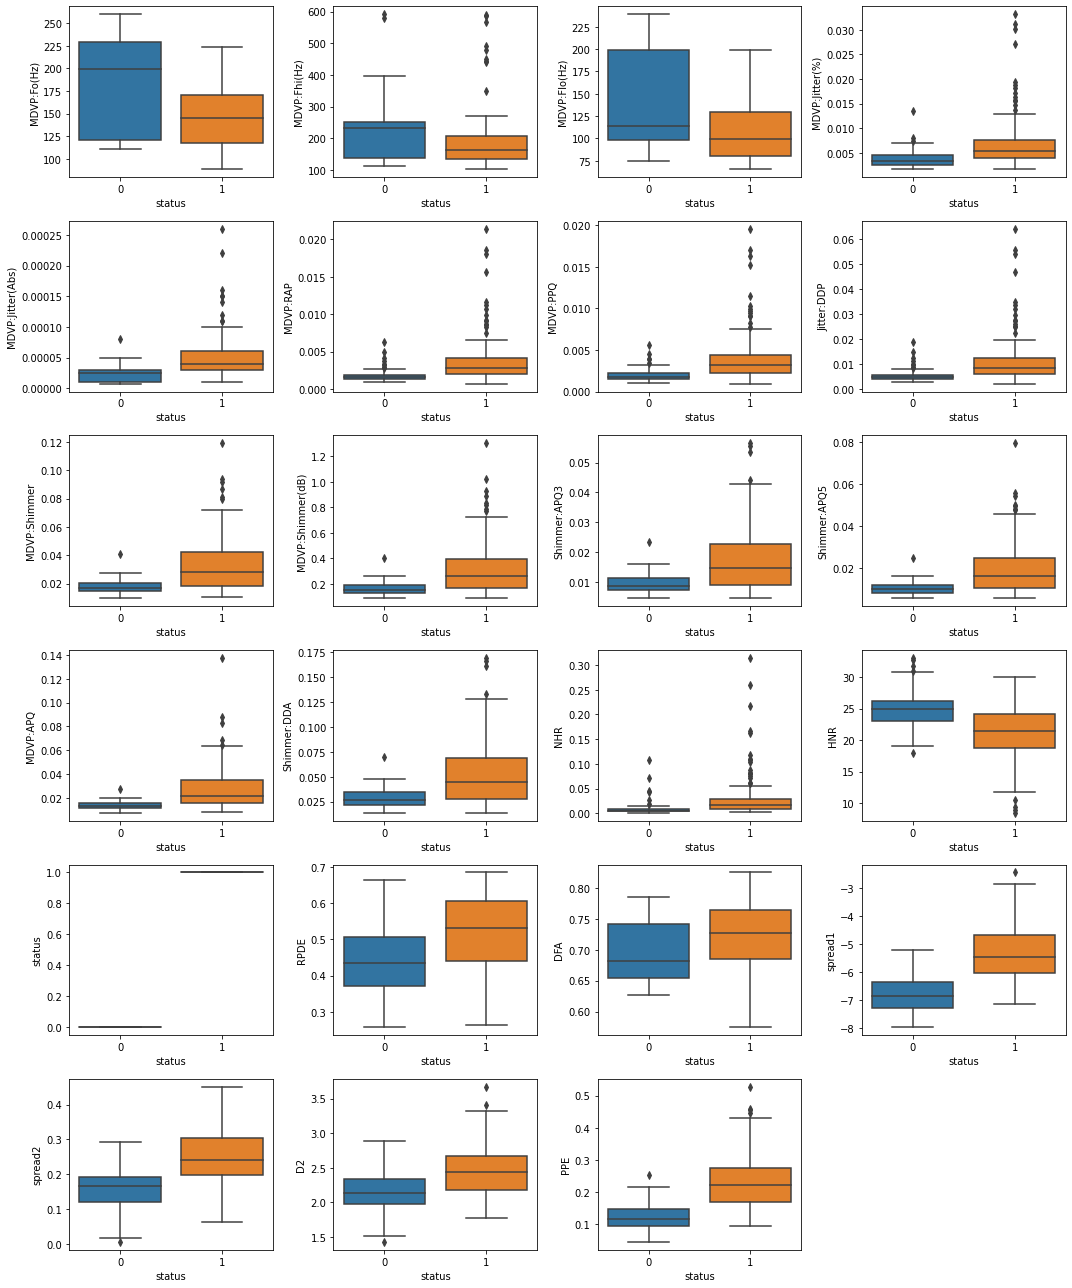

In [9]:
#EDA
parkdatann= parkdata.select_dtypes(exclude='object')
fig = plt.figure(figsize=(15,18))
for i in range(0,len(parkdatann.columns)):
    fig.add_subplot(6,4,i+1)
    sns.boxplot(x= parkdatann['status'],y=parkdatann.iloc[:,i])

plt.tight_layout()
plt.show()

**Correlation between different columns**

Many sets of columns have high corrleation.
1. MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP
2. MDVP:Jitter(%), MDVP:Shimmer(dB)
3. MDVP:PPQ, MDVP:Shimmer(dB)
4. MDVP:PPQ,  MDVP:APQ
5. NHR, MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP
6. spread1, PPE

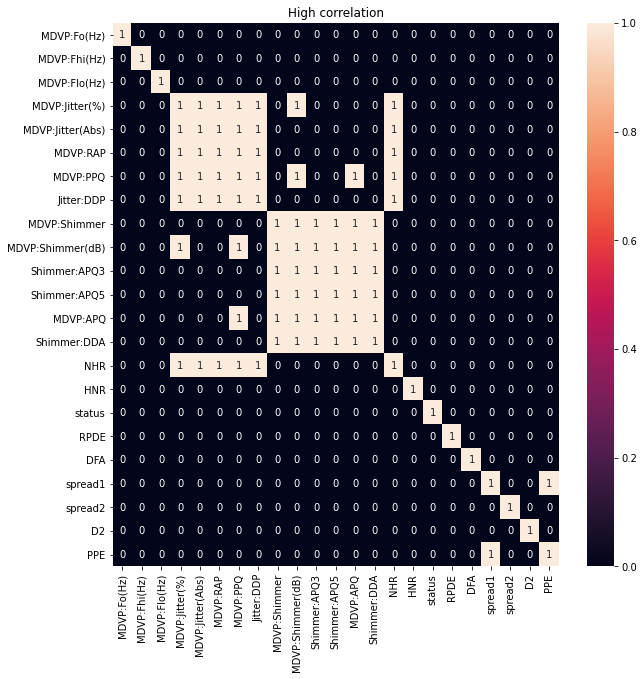

In [10]:
#EDA cont.
corr= parkdata.corr()
plt.figure(figsize=(10,10))
plt.title('High correlation')
sns.heatmap(corr>0.8, annot=True)

**Skewness**

Checking the skewness of each column

high skew column= skewness > 0.5

NHR                 4.188173
Jitter:DDP          3.336141
MDVP:RAP            3.334801
MDVP:Jitter(%)      3.061165
MDVP:PPQ            3.050196
MDVP:Jitter(Abs)    2.628650
MDVP:APQ            2.597864
MDVP:Fhi(Hz)        2.522549
MDVP:Shimmer(dB)    1.983976
Shimmer:APQ5        1.784831
MDVP:Shimmer        1.653634
Shimmer:DDA         1.568433
Shimmer:APQ3        1.568392
MDVP:Flo(Hz)        1.207966
PPE                 0.791343
MDVP:Fo(Hz)         0.587176
HNR                -0.510353
dtype: float64


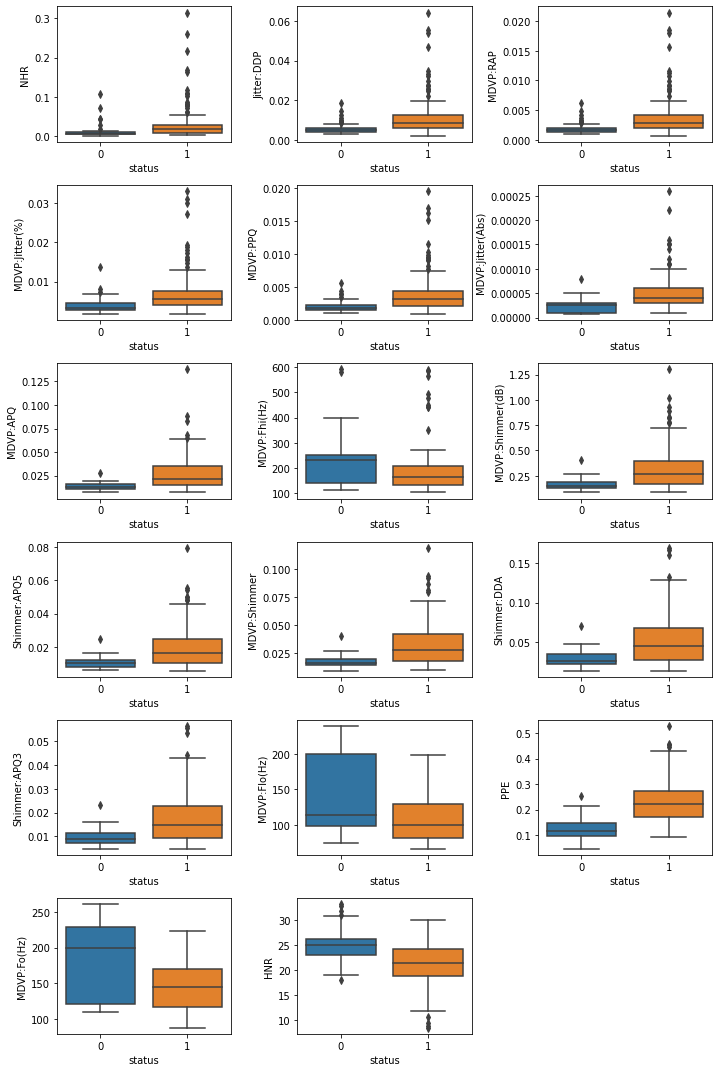

In [11]:
#Skewness: over 0.5= highly skew
from scipy.stats import skew
parkdata_try= parkdata.copy()
parkdata_try.drop(columns=['name','status'],inplace=True)
col_skewness= parkdata_try.apply(lambda x: skew(x)).sort_values(ascending= False)
high_skew = col_skewness[abs(col_skewness) > 0.5] 
print(high_skew)

#Observe the highly skew data
fig = plt.figure(figsize=(10,15))
for i in range(0,len(high_skew)):
    fig.add_subplot(6,3,i+1)
    sns.boxplot(x= parkdata['status'],y=parkdatann.loc[:,high_skew.index[i]])

plt.tight_layout()
plt.show()

**Data Preprocessing**

After investigating the data, I performed all the processing steps in the box below
0. Avoid data leakage: spit into test and train data
1. Remove outliers
2. Normalization
3. Scale

In [12]:
#Data preprocessing:
parkdata_try= parkdata.copy()
#Dropping cols: name seems to correlate with our status, might be sample from the same patient, we don't need it now
parkdata_try.drop(columns='name',inplace=True)

#Outliers
parkdata_try = parkdata_try.drop(parkdata_try[parkdata_try['MDVP:Fhi(Hz)']>500].index)
parkdata_try = parkdata_try.drop(parkdata_try[parkdata_try['MDVP:Jitter(%)']>0.025].index)
parkdata_try = parkdata_try.drop(parkdata_try[parkdata_try['MDVP:Jitter(Abs)']>0.00020].index)

#Before normalize and scale: pop y= status
y= parkdata_try.pop('status')

#Normalize high skew cols
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method='box-cox')
cols_to_transform= high_skew.index
parkdata_try[cols_to_transform] = pt.fit_transform(parkdata_try[cols_to_transform])

#Scale
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
mmscaler= MinMaxScaler() # performs the best
parkdata_try[parkdata_try.columns]= mmscaler.fit_transform(parkdata_try[parkdata_try.columns])

**Modeling**

Using LogisticRegression to solve this binary problem (0= healthy,1= PD)
1. Fit and Predict
2. Cross Validation
3. Stacking different models

In [13]:
#Modeling
from sklearn.metrics import accuracy_score
X= parkdata_try
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

LRmodel= LogisticRegression()
LRmodel.fit(X_train, y_train)
LRpreds= LRmodel.predict(X_val)
LRmae = mean_absolute_error(LRpreds,y_val)
LRmae

0.05263157894736842

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
a= -1*cross_val_score(LRmodel, X, y, cv=5, scoring='neg_mean_absolute_error')
print(a, a.mean())

[0.02631579 0.18421053 0.18918919 0.18918919 0.24324324] 0.1664295874822191


LogisticRegression Training Score: 0.1558
KNeighborsClassifier Training Score: 0.1872
SVC Training Score: 0.1718
XGBClassifier Training Score: 0.1657
StackingClassifier Training Score: 0.1873


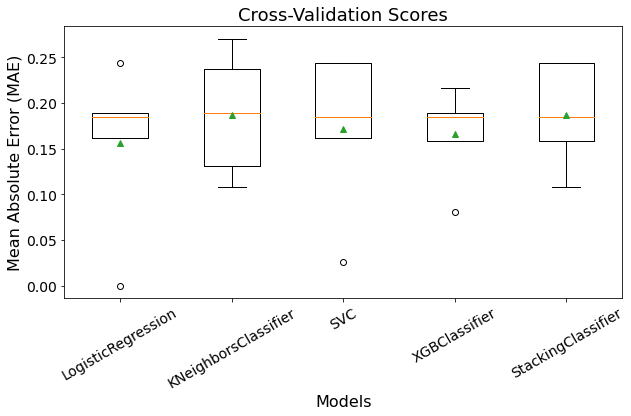

In [14]:
#Stacking doesn't help
#try neural network next time
models = [LogisticRegression(solver='liblinear'),
          KNeighborsClassifier(n_neighbors=11, p=2),
          SVC(kernel='rbf', C=100, gamma=0.01),
          XGBClassifier()]

estimator_names = ['LogisticRegressor', 'KNeighborsClassifier', 'SVC', 'XGBClassifier']
estimators = [(estimator_names[i], model) for i, model in enumerate(models)]
Stacked = StackingClassifier(estimators=estimators, final_estimator= LogisticRegression(solver='liblinear'), cv=3)
models.append(Stacked)

MAE=[]
modelnames=[]

for i, model in enumerate(models):
    MAE.append(-1 * cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error'))
    modelnames.append(str(model).split('(')[0])
    print('{} Training Score: {}'.format(modelnames[i], round(np.mean(MAE[i]),4)))

plt.figure(figsize=(10,5))
plt.boxplot(MAE, labels=modelnames, showmeans=True)
plt.xlabel('Models', fontsize=16)
plt.xticks(rotation=30)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=16)
plt.title('Cross-Validation Scores', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 14)

**Transforming the result**

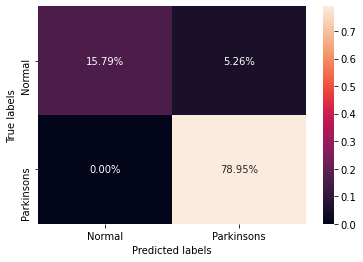

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, test_preds)
cf_matrix

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Normal', 'Parkinsons']); ax.yaxis.set_ticklabels(['Normal', 'Parkinsons']);

**Build a Predictive System**

With my preprocessing methods and final, I incorporated it into a system that can efficiently detect any new input data

In [ ]:
#Build a predictive system
input_data=(244.99000,272.21000,239.17000,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,0.18100,0.01084,0.01121,0.01255,0.03253,0.01049,21.52800,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220)
inputdf = preprocess(input_data)
prediction= LRmodel.predict(inputdf)

if prediction ==0:
  print('Person is healthy')
else:
  print('Person might have Parkinsons')

Person is healthy
